<a href="https://colab.research.google.com/github/jiadmiftx/My-Essay-Plants-Identifier/blob/master/Lab_Skripsi_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import main library
import matplotlib.pyplot as plt
from PIL import Image
 
#Import pytorch library
from torch.nn import Module
from torch.utils.data import Dataset, DataLoader
from torch.functional import F
from pathlib import Path
import torchvision.transforms as trfm
from torch import nn
import torch.optim as optim
import torch
from torchvision.models import mobilenet_v2
from torchsummary import summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

'Android Advanced Course slides'/
'cjv-cuwk-ruk - 16 Nov 2020.gjam'
 Classroom/
'CNCF Telecom User Group Kickoff.gslides'
 Dien/
 DSCF2015.JPG
 DSCF2021.JPG
 DSCF2025.JPG
 DSCF2147.JPG
'Form Registrasi Workshop #1 Practical Data Mining.gform'
'Formulir tanpa judul.gform'
 Foto/
 hehehe.gsheet
'IDENTITAS PENITIP.pdf'
'Jam Tanpa Judul.gjam'
 knowledge/
 Komunitas/
 _MG_6565.JPG
 _MG_6573.JPG
 _MG_6574.JPG
 _MG_6577.JPG
 _MG_6579.JPG
 _MG_6580.JPG
 _MG_6581.JPG
 _MG_6582.JPG
 _MG_6583.JPG
 _MG_6584.JPG
 _MG_6586.JPG
 _MG_6588.JPG
 _MG_6594.JPG
 _MG_6598.JPG
 _MG_6601.JPG
'PC BukberDay - 28 Mei 2019.gform'
'Pendaftaran StudyGroup Web Design.gform'
'Presentasi tanpa judul (1).gslides'
'Presentasi tanpa judul.gslides'
'Registrasi StudyGroup Kotlin Android.gform'
'RSVP Event SharingDay PCBUMIGORA #1.gform'
 Sibooking.drawio
'Struktur 4.0 PC Bumigora.gslides'
'Untitled Diagram.drawio'
'Untitled Diagram.html'
'VISI DAN MISI PROGRAMMING COMMUNITY.gdoc'
 xxxxx.gslides


In [ ]:
ls

drive/  sample_data/


In [ ]:
# Hasil training model
import pandas as pd
data = pd.read_csv("mobilenets.csv")
# data = data.drop(1)
data.head()

,Train Loss,Valid Loss,Train Accuracy,Valid Accuracy
0,1.988232,1.922930,41.940792,51.602566
1,1.731489,1.720221,66.611847,65.705132
2,1.452813,1.465935,79.769737,75.160255
3,1.218487,1.248222,84.539474,80.448715
4,1.021725,1.059674,90.131584,86.217949


In [ ]:
# datas = data.drop(0)
data.keys()

Index(['Train Loss', ' Valid Loss', ' Train Accuracy', ' Valid Accuracy '], dtype='object')

In [ ]:
data.round({'Train Loss':2,' Valid Loss':2,' Train Accuracy':2, ' Valid Accuracy ':2})

,Train Loss,Valid Loss,Train Accuracy,Valid Accuracy
0,1.99,1.92,41.94,51.60
1,1.73,1.72,66.61,65.71
2,1.45,1.47,79.77,75.16
3,1.22,1.25,84.54,80.45
4,1.02,1.06,90.13,86.22
5,0.82,0.91,93.42,92.95
6,0.68,0.77,93.91,94.71
7,0.60,0.66,94.90,94.23
8,0.48,0.57,96.88,96.63
9,0.40,0.51,98.52,97.28


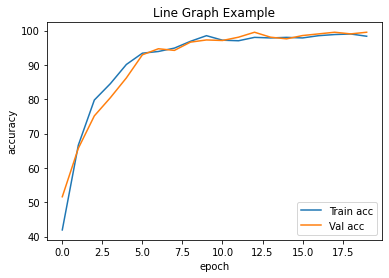

In [ ]:
# grpahic accuracy training
import matplotlib.pyplot as plt
data.round(3)

y = data[' Train Accuracy']

x  = range(len(y))
y1 = data[' Train Accuracy'].tolist()
y2 = data[' Valid Accuracy '].tolist()
plt.plot(x, y1, label="Train acc")
plt.plot(x, y2, label="Val acc")
plt.plot()

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Line Graph Example")
plt.legend()
plt.show()

***Langkah - Proses Training***

In [ ]:
# Folder data set
p = Path('dataset-daun10/train')

In [ ]:
# Melihat semua isi dari folder p
list(p.glob('*'))

[PosixPath('dataset-daun10/train/Tin_Ara'),
 PosixPath('dataset-daun10/train/Gingseng_Jawa'),
 PosixPath('dataset-daun10/train/Kumis_Kucing'),
 PosixPath('dataset-daun10/train/Bugenvil_Putih'),
 PosixPath('dataset-daun10/train/Keji_Beling'),
 PosixPath('dataset-daun10/train/Daun_Sirih'),
 PosixPath('dataset-daun10/train/Sembung'),
 PosixPath('dataset-daun10/train/Buah_Ajaib'),
 PosixPath('dataset-daun10/train/Kumquat_Nagami'),
 PosixPath('dataset-daun10/train/Pukul_Empat')]

In [ ]:
list(enumerate(list(p.iterdir())))

[(0, PosixPath('dataset-daun10/train/Tin_Ara')),
 (1, PosixPath('dataset-daun10/train/Gingseng_Jawa')),
 (2, PosixPath('dataset-daun10/train/Kumis_Kucing')),
 (3, PosixPath('dataset-daun10/train/Bugenvil_Putih')),
 (4, PosixPath('dataset-daun10/train/Keji_Beling')),
 (5, PosixPath('dataset-daun10/train/Daun_Sirih')),
 (6, PosixPath('dataset-daun10/train/Sembung')),
 (7, PosixPath('dataset-daun10/train/Buah_Ajaib')),
 (8, PosixPath('dataset-daun10/train/Kumquat_Nagami')),
 (9, PosixPath('dataset-daun10/train/Pukul_Empat'))]

In [ ]:
# One hot enconding <- silahkan googling
one_hot = {x[1].name:x[0] for x in list(enumerate(list(p.iterdir())))}
# sorted(one_hot, key=lambda x:x[1])
one_hot

{'Buah_Ajaib': 7,
 'Bugenvil_Putih': 3,
 'Daun_Sirih': 5,
 'Gingseng_Jawa': 1,
 'Keji_Beling': 4,
 'Kumis_Kucing': 2,
 'Kumquat_Nagami': 8,
 'Pukul_Empat': 9,
 'Sembung': 6,
 'Tin_Ara': 0}

In [ ]:
# Membuat dataset
class DatasetDaun(Dataset):
  {x[1].name:x[0] for x in list(enumerate(list(p.iterdir())))}
  def __init__(self, path, trfm=None):
    self.path = Path(path)
    self.images = list(self.path.glob("*/*.jpg"))
    self.trfm = trfm
    self.do_one_hot_encoding()
  
  def do_one_hot_encoding(self):
    self.one_hot = {x[1].name:x[0] for x in list(enumerate(list(p.iterdir())))}

  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, i):
    path_image = self.images[i]
    image = Image.open(path_image)
    target = self.one_hot[path_image.parent.name]
    if self.trfm != None:
      image = self.trfm(image)
    return image, target
  

In [ ]:
train_trfm = trfm.Compose([
                           trfm.Resize((300, 300)),
                           trfm.CenterCrop((224, 224)),
                           trfm.RandomHorizontalFlip(),
                           trfm.RandomVerticalFlip(),
                           trfm.RandomRotation(30),
                           trfm.CenterCrop((224, 224)),
                           trfm.RandomHorizontalFlip(),
                           trfm.RandomVerticalFlip(),
                           trfm.RandomRotation(30),
                           trfm.ToTensor(),
                           trfm.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

valid_trfm = trfm.Compose([
                           trfm.Resize((300, 300)),
                           trfm.CenterCrop((224, 224)),
                           trfm.ToTensor(),
                           trfm.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# mymodel = mobilenet_v2(pretrained=True)
# Menggunakan mobileNetV2 <- silahkan googling
mymodel = mobilenet_v2()

In [ ]:
mymodel.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(1280, 10)
)

In [ ]:
# Melihat isi layer model
mymodel.to(device)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
train_set = DatasetDaun("dataset-daun10/train", train_trfm)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
train_loader_iter = iter(train_loader)

In [ ]:
valid_set = DatasetDaun("dataset-daun10/test", valid_trfm)
valid_loader = DataLoader(valid_set, batch_size=16, shuffle=True)
valid_loader_iter = iter(valid_loader)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mymodel.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Membuat file CSV dengan nama mobilenetTesting.csv untuk mencatat nilai acc & validasi saat training
with open("mobilenetTesting.csv", mode='a') as f:
  f.write("Train Loss, Valid Loss, Train Accuracy, Valid Accuracy \n")
def save_data_loss(data):
  with open("mobilenetTesting.csv", mode='a') as f:
    f.write(f'{data}\n')

In [ ]:
ls

02-entire_model.pt  dataloss.csv                mobilenet1.csv
assets/             datalossD1.csv              mobilenet-fix.pt
coba.pth            dataset-daun10/             mobilenets.csv
dataloss0001.csv    entire_model.pt             mobilenettest.csv
dataloss001.csv     fixdahmodel.pt              mobilenetTesting.csv
dataloss1.csv       fix_model.pt                modelfixfix.pt
dataloss2.csv       fixmodel.pt                 state_dictentire_model.pt
datalossA1.csv      latest.pth                  state_dictfix_model.pt
datalossB1.csv      mobile_CPU_mobile_model.pt  state_dict_mobile_model.pt
datalossB2.csv      mobile_model_jit.pt         state_dict_model.pt
datalossC1.csv      mobile_model.pt


In [ ]:
# mymodel = torch.load("mobilenet-fix.pt")
# mymodel.eval()

In [ ]:
for epoch in range(100):

    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []

    mymodel.train()
    for index, train in enumerate(train_loader):
        image, target = train
        optimizer.zero_grad()
        forward = mymodel(image.to(device))
        y_pred = forward.argmax(1)
        loss = criterion(forward, target.to(device))
        loss.backward()
        optimizer.step()
        acc = sum(1*(target.cpu() == y_pred.cpu()))/(len(target)+.0)
        train_loss.append(loss.item())
        train_acc.append(acc)

    mymodel.eval()
    for index, valid in enumerate(valid_loader):
        image, target = valid
        forward = mymodel(image.to(device))
        y_pred = forward.argmax(1)
        loss = criterion(forward, target.to(device))
        acc = sum(1*(target.cpu() == y_pred.cpu()))/(len(target)+.0)
        valid_loss.append(loss.item())
        valid_acc.append(acc)
        
    train_loss = sum(train_loss)/len(train_loss)
    valid_loss = sum(valid_loss)/len(valid_loss)
    train_accuracy = (sum(train_acc)/len(train_acc))*100
    valid_accuracy = (sum(valid_acc)/len(valid_acc))*100
    print(f"Epoch {epoch} - Train Loss {train_loss} - Valid loss {valid_loss} - Train accuracy {train_accuracy} - Valid accuracy {valid_accuracy}")
    save_data_loss(f"{train_loss},{valid_loss},{train_accuracy},{valid_accuracy}")


In [ ]:
import torch
import torchvision

In [ ]:
example = torch.rand(1, 3, 224, 224)
trace_script =  torch.jit.trace(model, example)

In [ ]:
trace_script.save("modelfixfix.pt")

In [ ]:
PATH = "fix_model.pt"

# Save model
torch.save(mymodel, PATH)
torch.save(mymodel.state_dict(), "state_dict"+PATH)

In [ ]:
classes = {one_hot[key]:key for key in one_hot.keys()}
classes

{0: 'Tin_Ara',
 1: 'Gingseng_Jawa',
 2: 'Kumis_Kucing',
 3: 'Bugenvil_Putih',
 4: 'Keji_Beling',
 5: 'Daun_Sirih',
 6: 'Sembung',
 7: 'Buah_Ajaib',
 8: 'Kumquat_Nagami',
 9: 'Pukul_Empat'}

truth Kumquat_Nagami predicted Kumquat_Nagami arg max tensor(8, device='cuda:0')
Y tensor([8, 5, 8, 7, 8, 5, 5, 4, 8, 5, 0, 4, 8, 2, 6, 3])
Pred tensor([[-0.4994,  1.8351,  0.8795, -0.9557, -1.5938,  0.3933, -0.8795, -0.9215,
          5.5836, -1.7401]], grad_fn=<CopyBackwards>)
tensor(8)


tensor([ True, False,  True, False,  True, False, False, False,  True, False,
        False, False,  True, False, False, False])

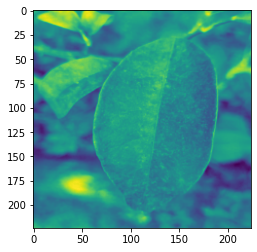

In [ ]:
# Test model yg sudah di training
mymodel.eval()
idx = 0
x, y = valid_loader_iter.next()

img, label = x[idx], y[idx]

# truth = classes[label.item()]
pred = mymodel.forward(img.unsqueeze(0).to(device))
max_ = torch.argmax(pred)
predicted = classes[max_.item()]
# print(pred)
# print(classes)

img = x[idx] * 224
plt.imshow(img[idx])
print("truth", classes[label.item()], "predicted", predicted, "arg max", max_)
print("Y", y.cpu())
print("Pred", pred.cpu())
print(max_.cpu())
y.cpu() == max_.cpu()

In [ ]:
# mymodel

**Lakukan di terminal ipython** untuk export ke mobile


In [ ]:
PATH = "mobile_model.pt"

# Save
# torch.save(mymodel, PATH)
torch.save(mymodel.state_dict(), "state_dict_"+PATH)

In [ ]:
PATH = "mobile_model.pt"
state_dicts = torch.load("state_dict_"+PATH)

In [ ]:
#Import model from torchvision untuk model yg akan digunkan
model = mobilenet_v2()

In [ ]:
#Import nn untuk memodifikasi jaringan classifier
import torch.nn as nn

In [ ]:
# Mengubah classifier(ujung layer) sesuai dengan jumlah kelas yang digunakan

model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(1280, 10)
)

In [ ]:
# Model me load state dict yg sudah disimpan sebelumnya
model.load_state_dict(state_dicts)
# masih optional
model.cpu()
# model eval
model.eval()

<All keys matched successfully>

In [ ]:
# mMengubah mode menjadi torchscript 
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(saved, example)
traced_script_module.save("mobile_model_fix.pt")

In [ ]:
mymodel.cpu()

In [ ]:
torch.save(mymodel.state_dict(), "mobile_CPU_"+PATH)

In [ ]:
trace_script_module.save("model.pt")

In [ ]:
input_tensor = torch.rand(1,3,224,224)
traced_script_module = torch.jit.trace(, input_tensor)

In [ ]:
traced_script_module.save("mobilenet-fix.pt")